In [ ]:
import pandas as pd

In [ ]:
file_path = 'Student_Performance.csv'
df = pd.read_csv(file_path)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape


(10000, 6)

In [ ]:
df.duplicated().sum()

127

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("First in-sample predictions on validation data:", y_pred[:5])

First in-sample predictions on validation data: [46.48001281 80.2853795  61.06518835 22.706315   74.8368676 ]


In [ ]:
error = y_pred - y_test
print("First in-sample prediction errors:", error[:5])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", mse)

First in-sample prediction errors: 6099   -0.519987
106     4.285379
9265   -0.934812
4707   -0.293685
2155   -1.163132
Name: Performance Index, dtype: float64
Mean Absolute Error 1.6469703984255573
Mean Squared Error 4.305900938538479


In [ ]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy (R² Score):", accuracy)

Model Accuracy (R² Score): 0.9884301209927054


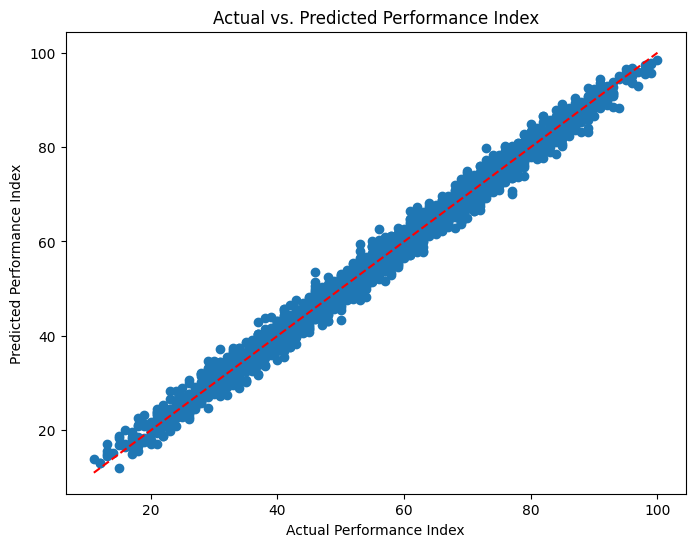

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
def predict_performance():
    hours_studied = float(input("Enter Hours Studied: "))
    previous_scores = float(input("Enter Previous Scores: "))
    extracurricular_activities = float(input("Enter Extracurricular Activities (Number): "))
    sleep_hours = float(input("Enter Sleep Hours: "))
    sample_question_papers = float(input("Enter Sample Question Papers Practiced: "))

    test_data = pd.DataFrame({
      'Hours Studied': [hours_studied],
      'Previous Scores': [previous_scores],
      'Extracurricular Activities': [extracurricular_activities],
      'Sleep Hours': [sleep_hours],
      'Sample Question Papers Practiced': [sample_question_papers]
    })
    predicted_performance = model.predict(test_data)
    print(f"Predicted Performance Index: {predicted_performance[0]:.2f}")

In [ ]:
predict_performance()


Enter Hours Studied: 5
Enter Previous Scores: 60
Enter Extracurricular Activities (Number): 1
Enter Sleep Hours: 8
Enter Sample Question Papers Practiced: 10
Predicted Performance Index: 47.62


In [ ]:
!pip install pyngrok

In [ ]:
!pip install flask-ngrok pandas scikit-learn joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib
joblib.dump(model, 'student_performance_model.pkl')


['student_performance_model.pkl']

In [ ]:
port_no = 5000

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import joblib
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok

app = Flask(__name__)
ngrok.set_auth_token("2TYaHjaDZaibGiAKL0h1m3CtKPQ_4q4F4kFn5vyoYoTaFqx2Q")
public_url = ngrok.connect(5000).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

model = joblib.load('student_performance_model.pkl')

run_with_ngrok(app)

@app.route('/')
def index():
    return '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Student Performance Prediction</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background-color: #f4f7f6;
                margin: 0;
                padding: 0;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
            }
            .container {
                background-color: white;
                padding: 40px;
                border-radius: 8px;
                box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.1);
                width: 400px;
            }
            h1 {
                text-align: center;
                color: #2C3E50;
            }
            input {
                width: 100%;
                padding: 10px;
                margin: 10px 0;
                border: 1px solid #ddd;
                border-radius: 4px;
                box-sizing: border-box;
            }
            button {
                width: 100%;
                padding: 12px;
                background-color: #3498db;
                border: none;
                color: white;
                font-size: 16px;
                cursor: pointer;
                border-radius: 4px;
            }
            button:hover {
                background-color: #2980b9;
            }
            .result {
                margin-top: 20px;
                font-size: 18px;
                color: #2C3E50;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Predict Student Performance</h1>
            <form method="POST" action="/predict">
                <label for="hours_studied">Hours Studied</label>
                <input type="number" name="hours_studied" required>

                <label for="previous_scores">Previous Scores</label>
                <input type="number" name="previous_scores" required>

                <label for="extracurricular_activities">Extracurricular Activities</label>
                <input type="number" name="extracurricular_activities" required>

                <label for="sleep_hours">Sleep Hours</label>
                <input type="number" name="sleep_hours" required>

                <label for="sample_question_papers">Sample Question Papers Practiced</label>
                <input type="number" name="sample_question_papers" required>

                <button type="submit">Predict</button>
            </form>
            {% if prediction %}
            <div class="result">
                <h2>Predicted Performance Index: {{ prediction | round(2) }}</h2>
            </div>
            {% endif %}
        </div>
    </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    # Get input values from the form
    hours_studied = float(request.form['hours_studied'])
    previous_scores = float(request.form['previous_scores'])
    extracurricular_activities = float(request.form['extracurricular_activities'])
    sleep_hours = float(request.form['sleep_hours'])
    sample_question_papers = float(request.form['sample_question_papers'])

    # Prepare data for prediction
    input_data = pd.DataFrame({
        'Hours Studied': [hours_studied],
        'Previous Scores': [previous_scores],
        'Extracurricular Activities': [extracurricular_activities],
        'Sleep Hours': [sleep_hours],
        'Sample Question Papers Practiced': [sample_question_papers]
    })

    # Get prediction from the model
    prediction = model.predict(input_data)

    return f'''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Student Performance Prediction</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                background-color: #f4f7f6;
                margin: 0;
                padding: 0;
                display: flex;
                justify-content: center;
                align-items: center;
                height: 100vh;
            }}
            .container {{
                background-color: white;
                padding: 40px;
                border-radius: 8px;
                box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.1);
                width: 400px;
            }}
            h1 {{
                text-align: center;
                color: #2C3E50;
            }}
            .result {{
                margin-top: 20px;
                font-size: 18px;
                color: #2C3E50;
                text-align: center;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Performance Prediction Result</h1>
            <div class="result">
                <h2>Predicted Performance Index: {prediction[0]:.2f}</h2>
            </div>
            <br>
            <a href="/">Go Back</a>
        </div>
    </body>
    </html>
    '''

# Run the Flask app
if __name__ == '__main__':
    app.run()


 * ngrok tunnel "https://d4a7-34-125-56-247.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://d4a7-34-125-56-247.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [02/Dec/2024 18:24:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Dec/2024 18:24:06] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Dec/2024 18:24:19] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Dec/2024 18:24:25] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Dec/2024 18:26:37] "POST /predict HTTP/1.1" 200 -
